<a href="https://colab.research.google.com/github/IsaacQ785/Washington-Uni/blob/Assignments/Assignment/Ass5-finished.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import os
import pandas as pd
from scipy.stats import zscore
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
import pandas as pd
import io
import requests
import numpy as np
from sklearn import metrics
from sklearn.model_selection import KFold
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from scipy.stats import zscore
from sklearn.model_selection import train_test_split as tts

# This is your student key that I emailed to you at the beginnning of the semester.
key = "Gx5en9cEVvaZnjut6vfLm1HG4ZdddsI32sgldAXj"  # This is an example key and will not work.

# You must also identify your source file.  (modify for your local setup)
file='/content/drive/My Drive/Colab Notebooks/assignment_yourname_class5.ipynb'  # Google CoLab
# file='C:\\Users\\jeffh\\projects\\t81_558_deep_learning\\assignments\\assignment_yourname_class5.ipynb'  # Windows
# file='/Users/jheaton/projects/t81_558_deep_learning/assignments/assignment_yourname_class5.ipynb'  # Mac/Linux

# Begin assignment
df_houses_train = pd.read_csv("https://data.heatonresearch.com/data/t81-558/datasets/houses_train.csv",index_col="id")
df_houses_submit = pd.read_csv("https://data.heatonresearch.com/data/t81-558/datasets/houses_test.csv")
df_zips = pd.read_csv("https://data.heatonresearch.com/data/t81-558/datasets/zips.csv",index_col="zip")

vals = df_houses_train["zip"].values

incs = pd.Series(df_zips.median_income.values,index=df_zips.index).to_dict()

df_houses_train["med_inc"] = df_houses_train["zip"].map(incs)
df_houses_train

,zip,bedrooms,bathrooms,garage,land,sqft,price,med_inc
id,,,,,,,,
1,60019,9,2,3,2.198,4860,1005580,125901
2,60049,5,2,2,4.517,2870,620278,236931
3,60011,2,1,0,4.120,1220,265711,211118
4,60027,6,4,2,3.201,3810,819916,419118
5,60001,9,3,2,1.347,5061,1039491,205564
...,...,...,...,...,...,...,...,...
9996,60028,1,1,0,2.244,709,145421,124015
9997,60022,1,1,0,2.700,688,175004,439046
9998,60003,7,2,2,2.011,3944,813447,145929


In [67]:
df_houses_submit.head()

,id,zip,bedrooms,bathrooms,garage,land,sqft
0,10001,60027,8,6,2,2.901,5237
1,10002,60026,7,2,2,2.455,3929
2,10003,60036,2,1,0,4.213,1200
3,10004,60016,2,1,0,0.537,1152
4,10005,60044,3,1,1,3.014,1681


In [71]:
df_houses_train.drop("zip",axis=1,inplace=True)

In [72]:
x = df_houses_train.drop("price",axis=1).values
y = df_houses_train["price"].values

In [126]:
x_train, x_test,y_train, y_test = tts(x,y,test_size=0.2,random_state=27)
model = Sequential()
n = 50
model.add(Dense(n,input_dim=x_train.shape[1],activation="relu"))
model.add(Dense(n/2,activation="relu"))
model.add(Dense(1))
model.compile(optimizer="adam",loss="mse")
monitor = EarlyStopping(monitor="val_loss",min_delta=1e-3, patience=5,restore_best_weights=True)
model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor],epochs=1000,verbose=0)

In [127]:
score = metrics.mean_absolute_error(model.predict(x_test),y_test)
print(score)


6577.0478515625


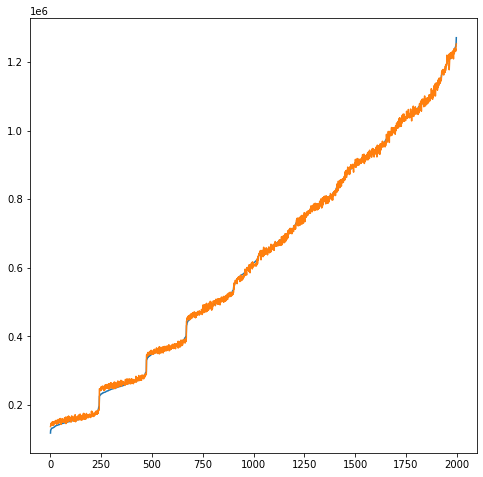

In [128]:
import matplotlib.pyplot as plt

vals = model.predict(x_test)
nums = [val[0] for val in vals]
pred = [num for _,num in sorted(zip(y_test,nums))]
ys = sorted(y_test)
fig = plt.figure(figsize=[8,8])
ax = fig.add_subplot(1,1,1)
ax.plot(ys)
ax.plot(pred)